<h1 style="color:red"> Aryan Soltani Mohammadi</h1>

Student id: 810198558

Second Phase of Fifth Project AI course


In [1]:
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
DATA_SET_ADDRESS = "/content/drive"
ADDRESS_TRAIN_DATA_SET = "/content/drive/My Drive/AI-dataset/dataset/train"
ADDRESS_TEST_DATA_SET = "/content/drive/My Drive/AI-dataset/dataset/test"
GRAY_SCALE = "grayscale"
IMG_SIZE = (128, 128)
BATCH_SIZE = 32
VALIDATION_SPLIT = 0.2
SEED = 1399

<h2>Part 1:</h2> 

In [3]:
from google.colab import drive
drive.mount(DATA_SET_ADDRESS)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


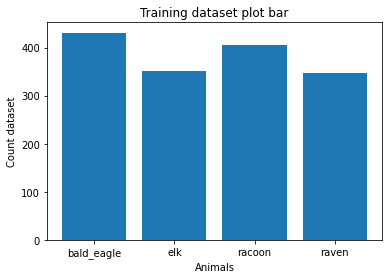

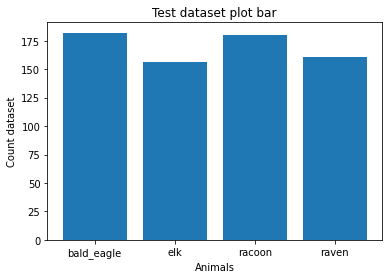

Total number of data that has been read is 2216


In [4]:
name_animals = []
count_animals = []
not_valid_data = 0
count_read = 0
for folder in os.listdir(ADDRESS_TRAIN_DATA_SET):
  folder_path = os.path.join(ADDRESS_TRAIN_DATA_SET, folder)
  for file in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file)
    file_obj = open(file_path, "rb")
    is_jfif = tf.compat.as_bytes("JFIF") in file_obj.peek(10)
    file_obj.close()

    if not is_jfif:
      not_valid_data += 1
      os.remove(file_path)
      continue
    count_read += 1
  count_animals.append(len(os.listdir(folder_path)))
  name_animals.append(folder)

plt.bar(name_animals, count_animals)
plt.title('Training dataset plot bar')
plt.xlabel('Animals')
plt.ylabel('Count dataset')
plt.show()

count_animals = []
name_animals = []

for folder in os.listdir(ADDRESS_TEST_DATA_SET):
  folder_path = os.path.join(ADDRESS_TEST_DATA_SET, folder)
  for file in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file)
    file_obj = open(file_path, "rb")
    is_jfif = tf.compat.as_bytes("JFIF") in file_obj.peek(10)
    file_obj.close()

    if not is_jfif:
      not_valid_data += 1
      os.remove(file_path)
      continue
    count_read += 1

  count_animals.append(len(os.listdir(folder_path)))
  name_animals.append(folder)


plt.bar(name_animals, count_animals)
plt.title('Test dataset plot bar')
plt.xlabel('Animals')
plt.ylabel('Count dataset')
plt.show()

print("Total number of data that has been read is", count_read, sep = ' ')

In [5]:
dataset_train_init = keras.utils.image_dataset_from_directory(
  ADDRESS_TRAIN_DATA_SET, color_mode = GRAY_SCALE, image_size = IMG_SIZE, batch_size = BATCH_SIZE, validation_split = VALIDATION_SPLIT,
  subset = "training", seed = SEED, label_mode = "int"
  )

dataset_validation_init = keras.utils.image_dataset_from_directory(
  ADDRESS_TRAIN_DATA_SET, color_mode = GRAY_SCALE, image_size = IMG_SIZE, batch_size = BATCH_SIZE, validation_split = VALIDATION_SPLIT,
  subset = "validation", seed = SEED, label_mode = "int")

dataset_test_init = keras.utils.image_dataset_from_directory(
  ADDRESS_TEST_DATA_SET, color_mode = GRAY_SCALE, image_size = IMG_SIZE, batch_size = BATCH_SIZE, label_mode = "int")


Found 1537 files belonging to 4 classes.
Using 1230 files for training.
Found 1537 files belonging to 4 classes.
Using 307 files for validation.
Found 679 files belonging to 4 classes.


There are 4 Classes: 
['bald_eagle', 'elk', 'racoon', 'raven']


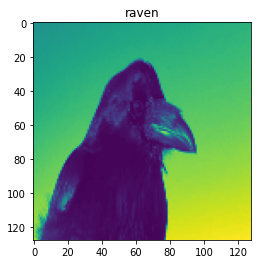

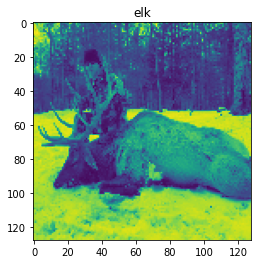

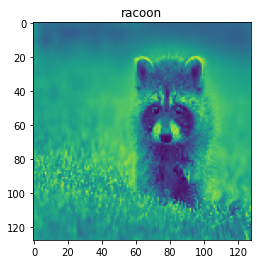

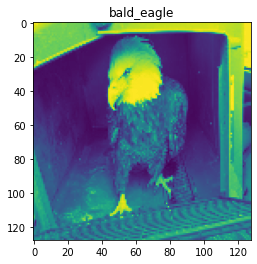

In [ ]:
class_names = dataset_train_init.class_names
print("There are", len(class_names), "Classes: ", sep = ' ' )
shape_need = IMG_SIZE
print(class_names)
mark = [0 for i in range(4)]
cnt = 0
for image_batch, labels_batch in dataset_train_init:
  if(cnt == 4):
    break
  for i in range(len(image_batch)):
    img = image_batch[i].numpy()
    shape_need = image_batch[i].shape
    img = img[:, :, 0]
    label_now = labels_batch[i].numpy()
    if(mark[label_now]):
      continue
    mark[label_now] = True
    cnt += 1
    plt.imshow(img)
    plt.title(class_names[label_now])
    plt.show()

We use One Hot Encoding to convert catagorical data to numerical data because in Neural Network we have mathematical operations which could apply only on numerical data.


In [6]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
onehot_layer = tf.keras.layers.CategoryEncoding(num_tokens = 4, output_mode = "one_hot")
dataset_train = dataset_train_init.map(lambda x, y: (normalization_layer(x), onehot_layer(y)))
dataset_test = dataset_test_init.map(lambda x, y: (normalization_layer(x), onehot_layer(y)))
dataset_validation = dataset_validation_init.map(lambda x, y: (normalization_layer(x), onehot_layer(y)))

<h2>Part 2</h2>

In [7]:
FIRST_HIDDEN_LAYER_SIZE = 256
SECOND_HIDDEN_LAYER_SIZE = 512
LEARNING_RATE = 0.01
EPOCHS = 10

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten

model_network = Sequential()

model_network.add(Flatten(input_shape=(128, 128, 1)))
model_network.add(Dense(FIRST_HIDDEN_LAYER_SIZE, activation = "relu"))

model_network.add(Dense(SECOND_HIDDEN_LAYER_SIZE, activation = "relu"))

model_network.add((Dense(4, activation = "softmax")))

optimizer = keras.optimizers.SGD(learning_rate=LEARNING_RATE)
model_network.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ["accuracy"])


epochs_data = model_network.fit(
    dataset_train, epochs=EPOCHS, validation_data= dataset_validation
)

Epoch 1/10
39/39 [==============================] - 16s 330ms/step - loss: 1.3663 - accuracy: 0.3358 - val_loss: 1.5134 - val_accuracy: 0.2541
Epoch 2/10
39/39 [==============================] - 15s 321ms/step - loss: 1.3013 - accuracy: 0.3821 - val_loss: 1.2195 - val_accuracy: 0.4137
Epoch 3/10
39/39 [==============================] - 15s 324ms/step - loss: 1.2005 - accuracy: 0.4650 - val_loss: 1.2159 - val_accuracy: 0.4235
Epoch 4/10
39/39 [==============================] - 15s 325ms/step - loss: 1.1871 - accuracy: 0.4837 - val_loss: 1.3068 - val_accuracy: 0.3713
Epoch 5/10
39/39 [==============================] - 15s 321ms/step - loss: 1.1439 - accuracy: 0.5106 - val_loss: 1.1335 - val_accuracy: 0.4886
Epoch 6/10
39/39 [==============================] - 15s 323ms/step - loss: 1.1111 - accuracy: 0.5114 - val_loss: 1.1067 - val_accuracy: 0.5114
Epoch 7/10
39/39 [==============================] - 15s 326ms/step - loss: 1.0603 - accuracy: 0.5398 - val_loss: 1.1861 - val_accuracy: 0.4397

In [11]:
def plot_draw(epochs_data):
  plt.plot(epochs_data.history['accuracy'])
  plt.plot(epochs_data.history['val_accuracy'])
  plt.xlabel("epochs")
  plt.ylabel("accuracy")
  plt.title("plot accuracy of epochs")
  plt.legend(['train accuracy', 'validation accuracy'])
  plt.show()
  plt.plot(epochs_data.history['loss'])
  plt.plot(epochs_data.history['val_loss'])
  plt.xlabel("epochs")
  plt.ylabel("loss")
  plt.title("plot loss of epochs")
  plt.legend(['train loss', 'validation loss'])
  plt.show()

In [12]:
from sklearn.metrics import classification_report

def conf_matrix(model_network, dataset_validation, dataset_train):

  predictions = np.array([])
  labels = np.array([])

  print("Validation DataSet Confusion Matrix: ")

  for x, y in dataset_validation:
    pred = model_network.predict(x)
    pred = np.argmax(pred, axis = 1)
    predictions = np.concatenate([predictions, pred], axis = -1)
    labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])
  print(classification_report(predictions, labels))

  print("Train DataSet Confusion Matrix: ")
  predictions = np.array([])
  labels = np.array([])

  for x, y in dataset_train:
    pred = model_network.predict(x)
    pred = np.argmax(pred, axis = 1)
    predictions = np.concatenate([predictions, pred], axis = -1)
    labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])
  print(classification_report(predictions, labels))

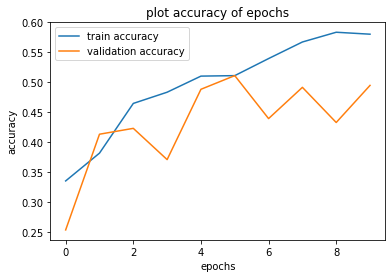

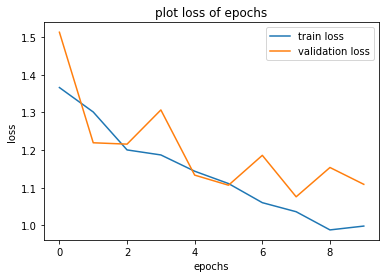

In [ ]:
plot_draw(epochs_data)

In [ ]:
conf_matrix(model_network, dataset_validation, dataset_train)

Validation DataSet Confusion Matrix: 
              precision    recall  f1-score   support

         0.0       0.32      0.62      0.42        50
         1.0       0.87      0.39      0.54       158
         2.0       0.30      0.72      0.43        32
         3.0       0.57      0.54      0.55        67

    accuracy                           0.50       307
   macro avg       0.52      0.57      0.49       307
weighted avg       0.66      0.50      0.51       307

Train DataSet Confusion Matrix: 
              precision    recall  f1-score   support

         0.0       0.44      0.65      0.52       227
         1.0       0.93      0.44      0.60       596
         2.0       0.43      0.86      0.57       165
         3.0       0.62      0.73      0.67       242

    accuracy                           0.59      1230
   macro avg       0.60      0.67      0.59      1230
weighted avg       0.71      0.59      0.59      1230



In [ ]:
model_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 16384)             0         
                                                                 
 dense (Dense)               (None, 256)               4194560   
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dense_2 (Dense)             (None, 4)                 2052      
                                                                 
Total params: 4,328,196
Trainable params: 4,328,196
Non-trainable params: 0
_________________________________________________________________


As we can see input has 16384 neurons which is the number of pixels that is 128 * 128 after flattening it has become 16384. We have two hidden layers that first one has 256 neourons and the second one has 512 neurons which we can observe in the summary. and at last we have 4 neourons which is the last layer that is going to show each class probability after softmax.
Params in each layer shows number of edges from previous layer to this one and the bias edges for instance the second layer param is:
16384 * 256 + 256(for bias) = 4194560


<h2> Optimizer Effect:

Momentum approach to SGD adds a parameter named velocity and a hyperparameter named momenutum which control changes in velocity to avoid overshooting. This approach adds the effect of previous decents to our currently change in location. Therefore, it won't get stuck on a minima it is just like a ball which is moving on a curve. This approach makes the learning much faster with a little change.


Momentum: 0.5:

In [ ]:

model_network = Sequential()

model_network.add(Flatten(input_shape=(128, 128, 1)))
model_network.add(Dense(FIRST_HIDDEN_LAYER_SIZE, activation = "relu"))

model_network.add(Dense(SECOND_HIDDEN_LAYER_SIZE, activation = "relu"))

model_network.add((Dense(4, activation = "softmax")))

optimizer = keras.optimizers.SGD(learning_rate=LEARNING_RATE, momentum = 0.5)
model_network.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ["accuracy"])


epochs_data = model_network.fit(
    dataset_train, epochs=EPOCHS, validation_data= dataset_validation
)

Epoch 1/10
39/39 [==============================] - 15s 315ms/step - loss: 1.3495 - accuracy: 0.3715 - val_loss: 1.2928 - val_accuracy: 0.4039
Epoch 2/10
39/39 [==============================] - 15s 319ms/step - loss: 1.2520 - accuracy: 0.4341 - val_loss: 1.2615 - val_accuracy: 0.3876
Epoch 3/10
39/39 [==============================] - 15s 317ms/step - loss: 1.1783 - accuracy: 0.4569 - val_loss: 1.3249 - val_accuracy: 0.4300
Epoch 4/10
39/39 [==============================] - 15s 320ms/step - loss: 1.1576 - accuracy: 0.5000 - val_loss: 1.3151 - val_accuracy: 0.4039
Epoch 5/10
39/39 [==============================] - 15s 322ms/step - loss: 1.0926 - accuracy: 0.5211 - val_loss: 1.2423 - val_accuracy: 0.4300
Epoch 6/10
39/39 [==============================] - 15s 321ms/step - loss: 1.0405 - accuracy: 0.5374 - val_loss: 1.2092 - val_accuracy: 0.4528
Epoch 7/10
39/39 [==============================] - 14s 314ms/step - loss: 1.0161 - accuracy: 0.5553 - val_loss: 1.2764 - val_accuracy: 0.4072

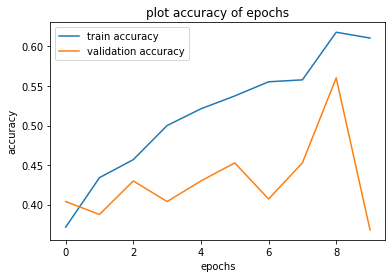

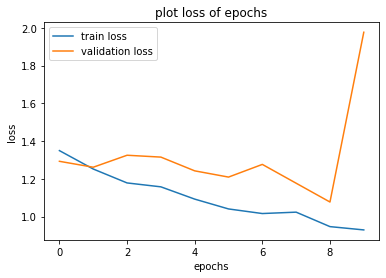

In [ ]:
plot_draw(epochs_data)

In [ ]:
conf_matrix(model_network, dataset_validation, dataset_train)

Validation DataSet Confusion Matrix: 
              precision    recall  f1-score   support

         0.0       0.20      0.76      0.31        25
         1.0       0.27      0.63      0.38        30
         2.0       0.16      0.80      0.26        15
         3.0       1.00      0.27      0.42       237

    accuracy                           0.37       307
   macro avg       0.41      0.61      0.34       307
weighted avg       0.82      0.37      0.40       307

Train DataSet Confusion Matrix: 
              precision    recall  f1-score   support

         0.0       0.20      0.74      0.32        90
         1.0       0.22      0.66      0.33        94
         2.0       0.28      0.90      0.43       105
         3.0       0.98      0.30      0.46       941

    accuracy                           0.41      1230
   macro avg       0.42      0.65      0.38      1230
weighted avg       0.81      0.41      0.43      1230



As we can see in this momentum convergrance has been increas thus it get in the right direction sooner compare than without having momentum. In this case can't be seen clearly in the validation but by increasing number of epochs this convergence increase could be seen easily.

Momentum 0.9:


In [ ]:
model_network = Sequential()

model_network.add(Flatten(input_shape=(128, 128, 1)))
model_network.add(Dense(FIRST_HIDDEN_LAYER_SIZE, activation = "relu"))

model_network.add(Dense(SECOND_HIDDEN_LAYER_SIZE, activation = "relu"))

model_network.add((Dense(4, activation = "softmax")))

optimizer = keras.optimizers.SGD(learning_rate=LEARNING_RATE, momentum = 0.9)
model_network.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ["accuracy"])


epochs_data = model_network.fit(
    dataset_train, epochs=EPOCHS, validation_data= dataset_validation
)

Epoch 1/10
39/39 [==============================] - 15s 319ms/step - loss: 1.4084 - accuracy: 0.3179 - val_loss: 1.4089 - val_accuracy: 0.3388
Epoch 2/10
39/39 [==============================] - 14s 313ms/step - loss: 1.2877 - accuracy: 0.3699 - val_loss: 1.2843 - val_accuracy: 0.3941
Epoch 3/10
39/39 [==============================] - 14s 314ms/step - loss: 1.2195 - accuracy: 0.4333 - val_loss: 1.3824 - val_accuracy: 0.4007
Epoch 4/10
39/39 [==============================] - 15s 314ms/step - loss: 1.2164 - accuracy: 0.4276 - val_loss: 1.3410 - val_accuracy: 0.4104
Epoch 5/10
39/39 [==============================] - 15s 315ms/step - loss: 1.1768 - accuracy: 0.4675 - val_loss: 1.2078 - val_accuracy: 0.4072
Epoch 6/10
39/39 [==============================] - 15s 314ms/step - loss: 1.1282 - accuracy: 0.4886 - val_loss: 1.1736 - val_accuracy: 0.4560
Epoch 7/10
39/39 [==============================] - 14s 311ms/step - loss: 1.0387 - accuracy: 0.5089 - val_loss: 1.1688 - val_accuracy: 0.4495

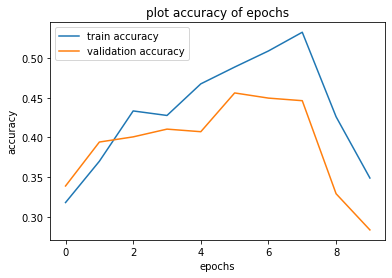

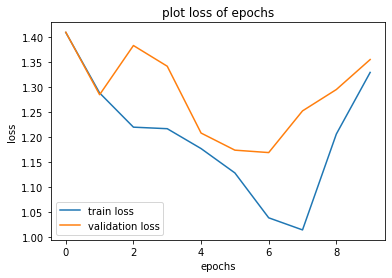

In [ ]:
plot_draw(epochs_data)

In [ ]:
conf_matrix(model_network, dataset_validation, dataset_train)

Validation DataSet Confusion Matrix: 


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.11      1.00      0.20        11
         1.0       0.00      0.00      0.00         0
         2.0       1.00      0.26      0.41       296
         3.0       0.00      0.00      0.00         0

    accuracy                           0.28       307
   macro avg       0.28      0.31      0.15       307
weighted avg       0.97      0.28      0.40       307

Train DataSet Confusion Matrix: 
              precision    recall  f1-score   support

         0.0       0.17      0.88      0.29        65
         1.0       0.01      1.00      0.01         2
         2.0       1.00      0.28      0.44      1163
         3.0       0.00      0.00      0.00         0

    accuracy                           0.32      1230
   macro avg       0.29      0.54      0.19      1230
weighted avg       0.95      0.32      0.43      1230



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In this momentum(0.9) our results gets much worse than momentum 0.5 because high momentum cause missing some local minima.

No, increasing momentum sometime leads to missing some minima because of the huge steps so the results get worse.

In [ ]:
model_network = Sequential()

model_network.add(Flatten(input_shape=(128, 128, 1)))
model_network.add(Dense(FIRST_HIDDEN_LAYER_SIZE, activation = "relu"))

model_network.add(Dense(SECOND_HIDDEN_LAYER_SIZE, activation = "relu"))

model_network.add((Dense(4, activation = "softmax")))

optimizer = keras.optimizers.Adam()
model_network.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ["accuracy"])


epochs_data = model_network.fit(
    dataset_train, epochs=EPOCHS, validation_data= dataset_validation
)

Epoch 1/10
39/39 [==============================] - 15s 329ms/step - loss: 3.6829 - accuracy: 0.2886 - val_loss: 1.3184 - val_accuracy: 0.4072
Epoch 2/10
39/39 [==============================] - 14s 315ms/step - loss: 1.3886 - accuracy: 0.3813 - val_loss: 1.3507 - val_accuracy: 0.4202
Epoch 3/10
39/39 [==============================] - 15s 316ms/step - loss: 1.1552 - accuracy: 0.4683 - val_loss: 1.3085 - val_accuracy: 0.4104
Epoch 4/10
39/39 [==============================] - 14s 316ms/step - loss: 1.1325 - accuracy: 0.4650 - val_loss: 1.2346 - val_accuracy: 0.4300
Epoch 5/10
39/39 [==============================] - 15s 318ms/step - loss: 1.0765 - accuracy: 0.5154 - val_loss: 1.1609 - val_accuracy: 0.5016
Epoch 6/10
39/39 [==============================] - 15s 322ms/step - loss: 1.0307 - accuracy: 0.5382 - val_loss: 1.3021 - val_accuracy: 0.4235
Epoch 7/10
39/39 [==============================] - 15s 327ms/step - loss: 0.9967 - accuracy: 0.5789 - val_loss: 1.1950 - val_accuracy: 0.4821

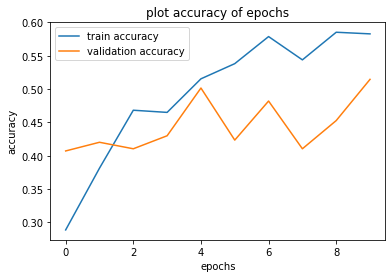

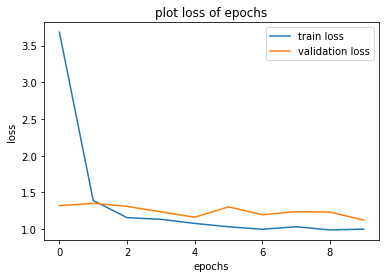

In [ ]:
plot_draw(epochs_data)

In [ ]:
conf_matrix(model_network, dataset_validation, dataset_train)

Validation DataSet Confusion Matrix: 
              precision    recall  f1-score   support

         0.0       0.68      0.49      0.57       134
         1.0       0.23      0.73      0.34        22
         2.0       0.59      0.45      0.51        99
         3.0       0.49      0.60      0.54        52

    accuracy                           0.51       307
   macro avg       0.50      0.57      0.49       307
weighted avg       0.59      0.51      0.53       307

Train DataSet Confusion Matrix: 
              precision    recall  f1-score   support

         0.0       0.81      0.54      0.64       504
         1.0       0.38      0.89      0.53       120
         2.0       0.80      0.66      0.73       400
         3.0       0.62      0.86      0.73       206

    accuracy                           0.67      1230
   macro avg       0.65      0.74      0.66      1230
weighted avg       0.73      0.67      0.67      1230



As we can see in the results by using Adam optimizer our results have got better.


<h2>Epochs Effect:

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten

EPOCHS = 20

model_network = Sequential()

model_network.add(Flatten(input_shape=(128, 128, 1)))
model_network.add(Dense(FIRST_HIDDEN_LAYER_SIZE, activation = "relu"))

model_network.add(Dense(SECOND_HIDDEN_LAYER_SIZE, activation = "relu"))

model_network.add((Dense(4, activation = "softmax")))

# optimizer = keras.optimizers.Adam()
model_network.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ["accuracy"])


epochs_data = model_network.fit(
    dataset_train, epochs=EPOCHS, validation_data= dataset_validation
)

Epoch 1/20
39/39 [==============================] - 17s 353ms/step - loss: 2.8580 - accuracy: 0.3163 - val_loss: 1.3160 - val_accuracy: 0.3941
Epoch 2/20
39/39 [==============================] - 16s 359ms/step - loss: 1.2849 - accuracy: 0.4309 - val_loss: 1.2473 - val_accuracy: 0.4300
Epoch 3/20
39/39 [==============================] - 16s 352ms/step - loss: 1.2099 - accuracy: 0.4667 - val_loss: 1.1476 - val_accuracy: 0.4821
Epoch 4/20
39/39 [==============================] - 16s 353ms/step - loss: 1.1088 - accuracy: 0.5293 - val_loss: 1.1214 - val_accuracy: 0.4951
Epoch 5/20
39/39 [==============================] - 17s 376ms/step - loss: 1.0664 - accuracy: 0.5276 - val_loss: 1.2453 - val_accuracy: 0.4397
Epoch 6/20
39/39 [==============================] - 18s 396ms/step - loss: 0.9844 - accuracy: 0.5659 - val_loss: 1.1432 - val_accuracy: 0.5114
Epoch 7/20
39/39 [==============================] - 17s 367ms/step - loss: 1.0287 - accuracy: 0.5764 - val_loss: 1.1270 - val_accuracy: 0.5147

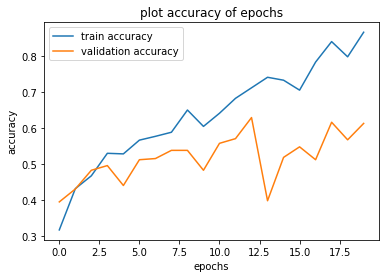

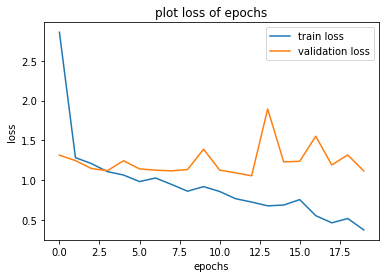

In [ ]:
plot_draw(epochs_data)

In [ ]:
conf_matrix(model_network, dataset_validation, dataset_train)

Validation DataSet Confusion Matrix: 
              precision    recall  f1-score   support

         0.0       0.46      0.79      0.58        57
         1.0       0.46      0.85      0.60        39
         2.0       0.78      0.50      0.61       117
         3.0       0.81      0.54      0.65        94

    accuracy                           0.61       307
   macro avg       0.63      0.67      0.61       307
weighted avg       0.69      0.61      0.62       307

Train DataSet Confusion Matrix: 
              precision    recall  f1-score   support

         0.0       0.76      0.96      0.85       264
         1.0       0.80      0.99      0.89       228
         2.0       0.99      0.78      0.88       419
         3.0       0.95      0.85      0.89       319

    accuracy                           0.88      1230
   macro avg       0.88      0.90      0.88      1230
weighted avg       0.90      0.88      0.88      1230



Using more number of epochs leads to more accurate results becuase we are changing the weights more number of times and usually using just one epoch could lead to underfiting and the number of epochs is usually related to the diversity of our data and the neural network architecture.

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten


EPOCHS = 40

model_network = Sequential()

model_network.add(Flatten(input_shape=(128, 128, 1)))
model_network.add(Dense(FIRST_HIDDEN_LAYER_SIZE, activation = "relu"))

model_network.add(Dense(SECOND_HIDDEN_LAYER_SIZE, activation = "relu"))

model_network.add((Dense(4, activation = "softmax")))

optimizer = keras.optimizers.Adam()
model_network.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ["accuracy"])


epochs_data = model_network.fit(
    dataset_train, epochs=EPOCHS, validation_data= dataset_validation
)

Epoch 1/40
39/39 [==============================] - 15s 318ms/step - loss: 2.5862 - accuracy: 0.3146 - val_loss: 1.4656 - val_accuracy: 0.3681
Epoch 2/40
39/39 [==============================] - 14s 311ms/step - loss: 1.2952 - accuracy: 0.4455 - val_loss: 1.2921 - val_accuracy: 0.3844
Epoch 3/40
39/39 [==============================] - 14s 314ms/step - loss: 1.2260 - accuracy: 0.4626 - val_loss: 1.1582 - val_accuracy: 0.4658
Epoch 4/40
39/39 [==============================] - 14s 313ms/step - loss: 1.0948 - accuracy: 0.5203 - val_loss: 1.2347 - val_accuracy: 0.4332
Epoch 5/40
39/39 [==============================] - 14s 312ms/step - loss: 1.1156 - accuracy: 0.5163 - val_loss: 1.1494 - val_accuracy: 0.4658
Epoch 6/40
39/39 [==============================] - 14s 313ms/step - loss: 1.0540 - accuracy: 0.5382 - val_loss: 1.1057 - val_accuracy: 0.5081
Epoch 7/40
39/39 [==============================] - 14s 315ms/step - loss: 1.0550 - accuracy: 0.5415 - val_loss: 1.3722 - val_accuracy: 0.4039

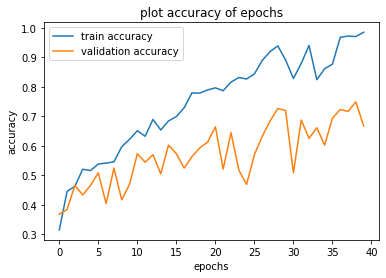

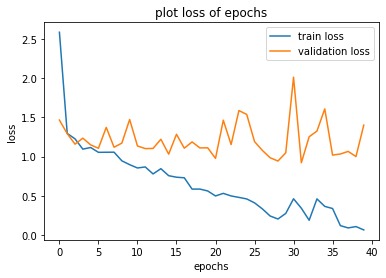

In [23]:
plot_draw(epochs_data)

In [24]:
conf_matrix(model_network, dataset_validation, dataset_train)

Validation DataSet Confusion Matrix: 
              precision    recall  f1-score   support

         0.0       0.49      0.74      0.59        65
         1.0       0.73      0.71      0.72        73
         2.0       0.64      0.88      0.74        56
         3.0       0.89      0.50      0.64       113

    accuracy                           0.67       307
   macro avg       0.69      0.71      0.67       307
weighted avg       0.72      0.67      0.67       307

Train DataSet Confusion Matrix: 
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96       309
         1.0       0.99      0.99      0.99       282
         2.0       0.98      1.00      0.99       324
         3.0       0.99      0.90      0.94       315

    accuracy                           0.97      1230
   macro avg       0.97      0.97      0.97      1230
weighted avg       0.97      0.97      0.97      1230



Near epoch 40 overfit occurs and it get worse after that which means that our prediction for our train data get better and our predicions for validation data get worse. As we can see in diagram train data digram accuray is getting near to 1 but validation occuracy alternate in a same place and sometime reduce.

For preventing overfiting we add EarlyStopping to our Keras model and we set a number which if after this number of echos we didn't have impromvent our model stops immedietly. In next models it has been used.

No using more epochs is not a good option because it could lead to overfiting.
One of the way we could prevent this is adding some dropout layers this layers ommit some of connections thus our model get more simpflify. Also we could delete some of feuture which their correlation with the labels.

<h2>Loss Function Effect</h2>

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten

EPOCHS = 20

model_network = Sequential()

model_network.add(Flatten(input_shape=(128, 128, 1)))
model_network.add(Dense(FIRST_HIDDEN_LAYER_SIZE, activation = "relu"))

model_network.add(Dense(SECOND_HIDDEN_LAYER_SIZE, activation = "relu"))

model_network.add((Dense(4, activation = "softmax")))

optimizer = keras.optimizers.Adam()
model_network.compile(loss = 'mean_squared_error', optimizer = optimizer, metrics = ["accuracy"])


epochs_data = model_network.fit(
    dataset_train, epochs=EPOCHS, validation_data= dataset_validation
)

Epoch 1/20
39/39 [==============================] - 17s 342ms/step - loss: 0.3781 - accuracy: 0.2285 - val_loss: 0.3844 - val_accuracy: 0.2313
Epoch 2/20
39/39 [==============================] - 15s 330ms/step - loss: 0.3858 - accuracy: 0.2285 - val_loss: 0.3844 - val_accuracy: 0.2313
Epoch 3/20
39/39 [==============================] - 15s 332ms/step - loss: 0.3858 - accuracy: 0.2285 - val_loss: 0.3844 - val_accuracy: 0.2313
Epoch 4/20
39/39 [==============================] - 15s 330ms/step - loss: 0.3858 - accuracy: 0.2285 - val_loss: 0.3844 - val_accuracy: 0.2313
Epoch 5/20
39/39 [==============================] - 15s 325ms/step - loss: 0.3858 - accuracy: 0.2285 - val_loss: 0.3844 - val_accuracy: 0.2313
Epoch 6/20
39/39 [==============================] - 15s 331ms/step - loss: 0.3858 - accuracy: 0.2285 - val_loss: 0.3844 - val_accuracy: 0.2313
Epoch 7/20
39/39 [==============================] - 15s 325ms/step - loss: 0.3858 - accuracy: 0.2285 - val_loss: 0.3844 - val_accuracy: 0.2313

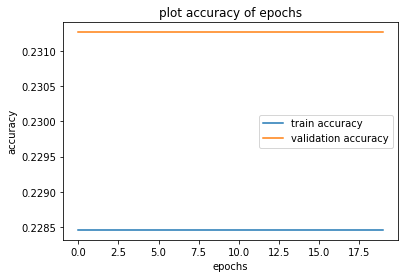

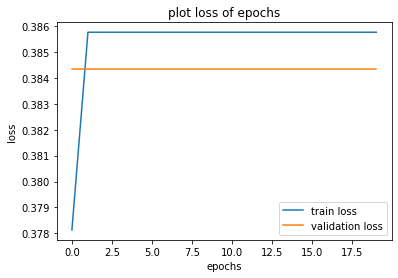

In [14]:
plot_draw(epochs_data)

In [15]:
conf_matrix(model_network, dataset_validation, dataset_train)

Validation DataSet Confusion Matrix: 


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.23      0.38       307
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         0

    accuracy                           0.23       307
   macro avg       0.25      0.06      0.09       307
weighted avg       1.00      0.23      0.38       307

Train DataSet Confusion Matrix: 
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.23      0.37      1230
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         0

    accuracy                           0.23      1230
   macro avg       0.25      0.06      0.09      1230
weighted avg       1.00      0.23      0.37      1230



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


As we can see this loss function doesn't work properly in our model. MSE usually is utilized in regression problems and it doesn't work good in classification problems like our problem. It usually good for normal distrbutions data and this our problem is just a classification and doesn't have nesseserily normal distrbution.

<h2> Regularization</h2>

In [16]:
EPOCHS = 20

model_network = Sequential()

model_network.add(Flatten(input_shape=(128, 128, 1)))
model_network.add(Dense(FIRST_HIDDEN_LAYER_SIZE, activation = "relu", kernel_regularizer = tf.keras.regularizers.l2(l2=0.0001)))

model_network.add(Dense(SECOND_HIDDEN_LAYER_SIZE, activation = "relu",  kernel_regularizer = tf.keras.regularizers.l2(l2=0.0001)))

model_network.add((Dense(4, activation = "softmax", kernel_regularizer = tf.keras.regularizers.l2(l2=0.0001))))

optimizer = keras.optimizers.Adam()
model_network.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ["accuracy"])


epochs_data = model_network.fit(
    dataset_train, epochs=EPOCHS, validation_data= dataset_validation
)

Epoch 1/20
39/39 [==============================] - 17s 349ms/step - loss: 3.1679 - accuracy: 0.2699 - val_loss: 1.3896 - val_accuracy: 0.3518
Epoch 2/20
39/39 [==============================] - 16s 342ms/step - loss: 1.3315 - accuracy: 0.4179 - val_loss: 1.2739 - val_accuracy: 0.4169
Epoch 3/20
39/39 [==============================] - 16s 340ms/step - loss: 1.2769 - accuracy: 0.4537 - val_loss: 1.3625 - val_accuracy: 0.4169
Epoch 4/20
39/39 [==============================] - 15s 337ms/step - loss: 1.2093 - accuracy: 0.4846 - val_loss: 1.2459 - val_accuracy: 0.4332
Epoch 5/20
39/39 [==============================] - 15s 337ms/step - loss: 1.1753 - accuracy: 0.5154 - val_loss: 1.2169 - val_accuracy: 0.4300
Epoch 6/20
39/39 [==============================] - 15s 334ms/step - loss: 1.2117 - accuracy: 0.4919 - val_loss: 1.2301 - val_accuracy: 0.4332
Epoch 7/20
39/39 [==============================] - 15s 335ms/step - loss: 1.1072 - accuracy: 0.5301 - val_loss: 1.2569 - val_accuracy: 0.4951

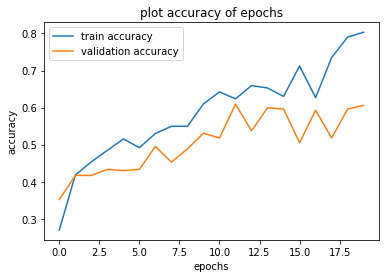

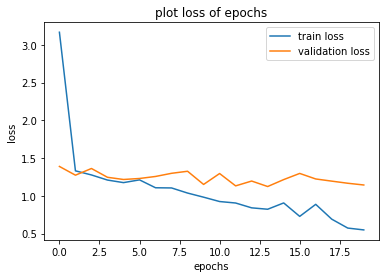

In [17]:
plot_draw(epochs_data)

In [18]:
conf_matrix(model_network, dataset_validation, dataset_train)

Validation DataSet Confusion Matrix: 
              precision    recall  f1-score   support

         0.0       0.48      0.68      0.57        69
         1.0       0.54      0.62      0.58        61
         2.0       0.68      0.60      0.64        87
         3.0       0.78      0.54      0.64        90

    accuracy                           0.61       307
   macro avg       0.62      0.61      0.61       307
weighted avg       0.64      0.61      0.61       307

Train DataSet Confusion Matrix: 
              precision    recall  f1-score   support

         0.0       0.67      0.86      0.75       260
         1.0       0.84      0.93      0.88       252
         2.0       0.97      0.86      0.91       371
         3.0       0.90      0.74      0.81       347

    accuracy                           0.84      1230
   macro avg       0.84      0.85      0.84      1230
weighted avg       0.86      0.84      0.84      1230



This regulizer avoid overfiting and as we can see in the diagram while the training increasing vaidation is increasing at the same time too. It add some value to the loss function so weights decrase and always have diffrence between train data.

In [19]:
EPOCHS = 20

model_network = Sequential()

model_network.add(Flatten(input_shape=(128, 128, 1)))
model_network.add(Dense(FIRST_HIDDEN_LAYER_SIZE, activation = "relu", kernel_regularizer = tf.keras.regularizers.l2(l2=0.0001)))

tf.keras.layers.Dropout(0.1)

model_network.add(Dense(SECOND_HIDDEN_LAYER_SIZE, activation = "relu",  kernel_regularizer = tf.keras.regularizers.l2(l2=0.0001)))

tf.keras.layers.Dropout(0.1)

model_network.add((Dense(4, activation = "softmax", kernel_regularizer = tf.keras.regularizers.l2(l2=0.0001))))

tf.keras.layers.Dropout(0.1)

optimizer = keras.optimizers.Adam()
model_network.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ["accuracy"])


epochs_data = model_network.fit(
    dataset_train, epochs=EPOCHS, validation_data= dataset_validation
)

Epoch 1/20
39/39 [==============================] - 16s 338ms/step - loss: 3.1878 - accuracy: 0.2927 - val_loss: 1.5300 - val_accuracy: 0.3257
Epoch 2/20
39/39 [==============================] - 15s 339ms/step - loss: 1.3246 - accuracy: 0.4317 - val_loss: 1.2832 - val_accuracy: 0.4625
Epoch 3/20
39/39 [==============================] - 15s 337ms/step - loss: 1.3336 - accuracy: 0.4724 - val_loss: 1.2927 - val_accuracy: 0.4528
Epoch 4/20
39/39 [==============================] - 15s 335ms/step - loss: 1.2101 - accuracy: 0.5016 - val_loss: 1.4251 - val_accuracy: 0.4528
Epoch 5/20
39/39 [==============================] - 15s 332ms/step - loss: 1.1686 - accuracy: 0.5293 - val_loss: 1.1716 - val_accuracy: 0.5212
Epoch 6/20
39/39 [==============================] - 15s 333ms/step - loss: 1.0595 - accuracy: 0.5805 - val_loss: 1.3168 - val_accuracy: 0.4430
Epoch 7/20
39/39 [==============================] - 15s 331ms/step - loss: 1.0565 - accuracy: 0.5927 - val_loss: 1.1499 - val_accuracy: 0.5537

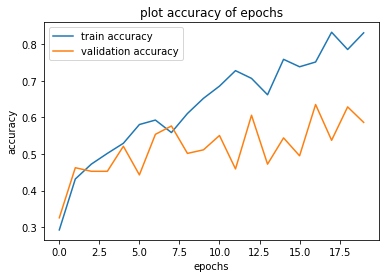

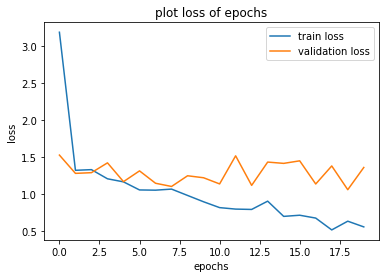

In [20]:
plot_draw(epochs_data)

In [21]:
conf_matrix(model_network, dataset_validation, dataset_train)

Validation DataSet Confusion Matrix: 
              precision    recall  f1-score   support

         0.0       0.22      0.78      0.34        27
         1.0       0.83      0.47      0.60       125
         2.0       0.71      0.70      0.71        77
         3.0       0.73      0.59      0.65        78

    accuracy                           0.59       307
   macro avg       0.62      0.64      0.57       307
weighted avg       0.72      0.59      0.62       307

Train DataSet Confusion Matrix: 
              precision    recall  f1-score   support

         0.0       0.47      0.96      0.63       162
         1.0       0.96      0.67      0.79       406
         2.0       0.96      0.91      0.94       350
         3.0       0.91      0.83      0.87       312

    accuracy                           0.82      1230
   macro avg       0.83      0.84      0.81      1230
weighted avg       0.88      0.82      0.83      1230



Dropout gets a frequency and delete a connection with the frequency for the layers that it is in the between of them.

In [ ]:
EPOCHS = 50

model_network = Sequential()

model_network.add(Flatten(input_shape=(128, 128, 1)))
model_network.add(Dense(FIRST_HIDDEN_LAYER_SIZE, activation = "relu", kernel_regularizer = tf.keras.regularizers.l2(l2=0.0001)))

tf.keras.layers.Dropout(0.1)

model_network.add(Dense(SECOND_HIDDEN_LAYER_SIZE, activation = "relu",  kernel_regularizer = tf.keras.regularizers.l2(l2=0.0001)))

tf.keras.layers.Dropout(0.1)

model_network.add((Dense(4, activation = "softmax", kernel_regularizer = tf.keras.regularizers.l2(l2=0.0001))))

tf.keras.layers.Dropout(0.1)

optimizer = keras.optimizers.Adam()
model_network.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ["accuracy"])


epochs_data = model_network.fit(
    dataset_train, epochs=EPOCHS, validation_data= dataset_validation
)

Epoch 1/50
39/39 [==============================] - 16s 337ms/step - loss: 4.0796 - accuracy: 0.2780 - val_loss: 1.5976 - val_accuracy: 0.3550
Epoch 2/50
39/39 [==============================] - 15s 330ms/step - loss: 1.4460 - accuracy: 0.3569 - val_loss: 1.3535 - val_accuracy: 0.3811
Epoch 3/50
39/39 [==============================] - 15s 329ms/step - loss: 1.2817 - accuracy: 0.4472 - val_loss: 1.2285 - val_accuracy: 0.4691
Epoch 4/50
39/39 [==============================] - 15s 334ms/step - loss: 1.1762 - accuracy: 0.5073 - val_loss: 1.3596 - val_accuracy: 0.3779
Epoch 5/50
39/39 [==============================] - 15s 332ms/step - loss: 1.1492 - accuracy: 0.5244 - val_loss: 1.3511 - val_accuracy: 0.4137
Epoch 6/50
39/39 [==============================] - 15s 331ms/step - loss: 1.0866 - accuracy: 0.5650 - val_loss: 1.3013 - val_accuracy: 0.4235
Epoch 7/50
39/39 [==============================] - 15s 330ms/step - loss: 1.0333 - accuracy: 0.5976 - val_loss: 1.2668 - val_accuracy: 0.4951

In [ ]:
correct = []
false = []
predictions = np.array([])
labels = np.array([])
for x, y in dataset_test:
    pred = model_network.predict(x)
    pred = np.argmax(pred, axis = 1)
    predictions = np.concatenate([predictions, pred], axis = -1)
    labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])
    for i in range(len(pred)):
      if(pred[i] == (np.argmax(y.numpy(), axis = -1))[i]):
        correct.append([pred[i], x[i].numpy()])
      else:
        false.append([pred[i], x[i].numpy()])
print(classification_report(predictions, labels))


              precision    recall  f1-score   support

         0.0       0.71      0.76      0.73       172
         1.0       0.84      0.81      0.83       161
         2.0       0.77      0.85      0.81       163
         3.0       0.84      0.74      0.79       183

    accuracy                           0.79       679
   macro avg       0.79      0.79      0.79       679
weighted avg       0.79      0.79      0.79       679



Type has decided correctly raven


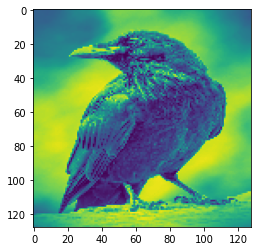

Type has decided correctly elk


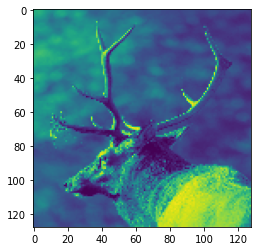

Type has decided correctly bald_eagle


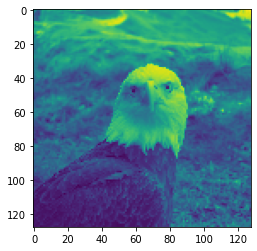

Type has decided correctly bald_eagle


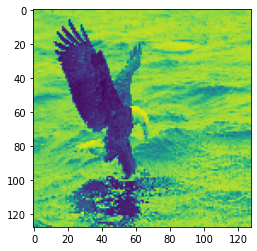

Type has decided correctly racoon


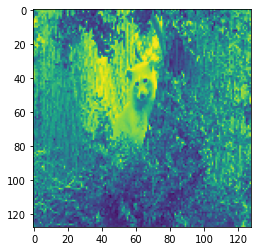

Type has decided correctly elk


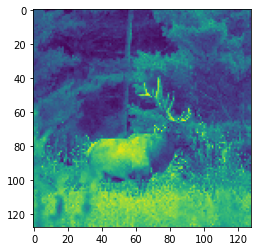

Type has decided correctly racoon


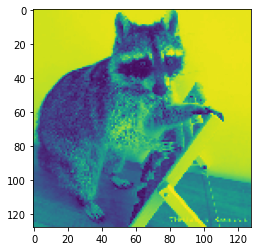

Type has decided correctly raven


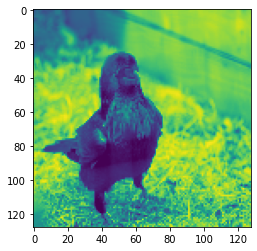

Type has decided correctly elk


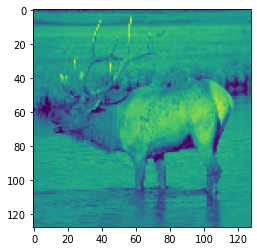

Type has decided correctly elk


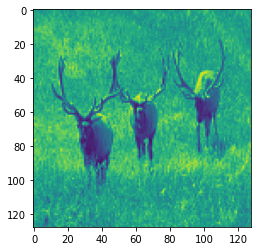

In [ ]:
lst_out = ['bald_eagle', 'elk', 'racoon', 'raven']
for i in range(10):
  print("Type has decided correctly", lst_out[correct[i][0]])
  img_now = [(y.tolist())[0] for x in correct[i][1] for y in x]
  img_ans = [[]]
  cnt = 0
  for x in img_now:
    if(cnt == 128):
      img_ans.append([])
      cnt = 0
    img_ans[-1].append(x)
    cnt += 1
  plt.imshow(img_ans)
  plt.show()

Type has decided by false raven


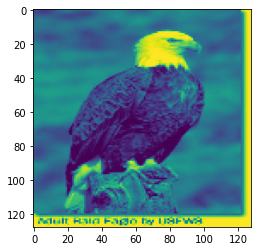

Type has decided by false bald_eagle


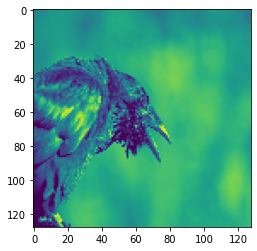

Type has decided by false elk


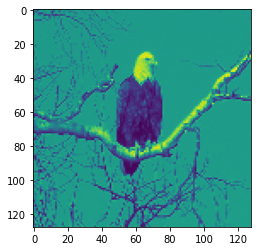

Type has decided by false raven


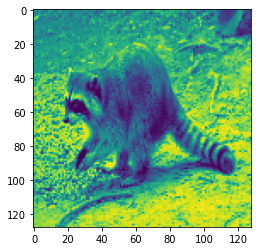

Type has decided by false elk


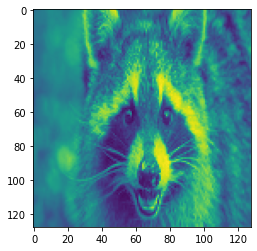

Type has decided by false elk


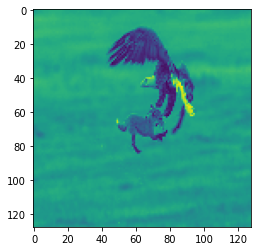

Type has decided by false raven


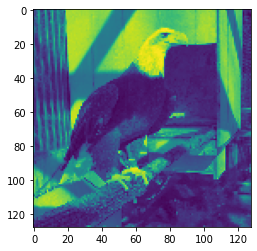

Type has decided by false raven


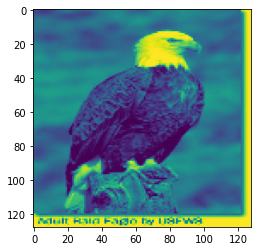

Type has decided by false bald_eagle


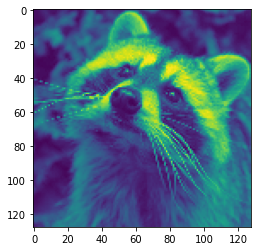

Type has decided by false elk


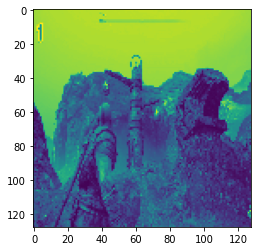

In [ ]:
lst_out = ['bald_eagle', 'elk', 'racoon', 'raven']
for i in range(10):
  print("Type has decided by false", lst_out[false[i][0]])
  img_now = [(y.tolist())[0] for x in false[i][1] for y in x]
  img_ans = [[]]
  cnt = 0
  for x in img_now:
    if(cnt == 128):
      img_ans.append([])
      cnt = 0
    img_ans[-1].append(x)
    cnt += 1
  plt.imshow(img_ans)
  plt.show()

Most of mistakes has occur becuause the images don't show the animal clearly or we have mostly have background instead of the animal. Most of the false is for the similarity between eagle and raven.

<h2> Bonus Part

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
import keras
from keras import layers

EPOCHS = 10

col = ['red', 'blue', 'green', 'yellow']

img = keras.Input(shape=(128,128, 1))

img_flat = layers.Flatten()(img)

layer1 = layers.Dense(512, activation='relu')(img_flat)
layer2 = layers.Dense(256, activation='relu')(layer1)
layer3 = layers.Dense(128, activation='relu')(layer2)
layer4 = layers.Dense(64, activation='relu')(layer3)
layer5 = layers.Dense(32, activation='relu')(layer4)
layer6 = layers.Dense(16, activation='relu')(layer5)
layer7 = layers.Dense(8, activation='relu')(layer6)
layer8 = layers.Dense(4, activation='relu')(layer7)
layer9 = layers.Dense(2, activation='relu')(layer8)

decoded = layers.Dense(4, activation='softmax')(layer9)

encoder = keras.Model(img, layer9)

autoencoder = keras.Model(img, decoded)



autoencoder.compile(optimizer='sgd', loss='categorical_crossentropy', metrics = ["accuracy"])

epochs_data = autoencoder.fit(
    dataset_train, epochs=EPOCHS, validation_data= dataset_validation
)




Epoch 1/10
39/39 [==============================] - 16s 341ms/step - loss: 1.3799 - accuracy: 0.2602 - val_loss: 1.3769 - val_accuracy: 0.2313
Epoch 2/10
39/39 [==============================] - 15s 332ms/step - loss: 1.3599 - accuracy: 0.3114 - val_loss: 1.3650 - val_accuracy: 0.3388
Epoch 3/10
39/39 [==============================] - 15s 339ms/step - loss: 1.3492 - accuracy: 0.3439 - val_loss: 1.3541 - val_accuracy: 0.3127
Epoch 4/10
39/39 [==============================] - 15s 330ms/step - loss: 1.3302 - accuracy: 0.3683 - val_loss: 1.3480 - val_accuracy: 0.4007
Epoch 5/10
39/39 [==============================] - 15s 326ms/step - loss: 1.3139 - accuracy: 0.3967 - val_loss: 1.3612 - val_accuracy: 0.3322
Epoch 6/10
39/39 [==============================] - 15s 331ms/step - loss: 1.3139 - accuracy: 0.3919 - val_loss: 1.3347 - val_accuracy: 0.3583
Epoch 7/10
39/39 [==============================] - 15s 329ms/step - loss: 1.2861 - accuracy: 0.4163 - val_loss: 1.3341 - val_accuracy: 0.3550

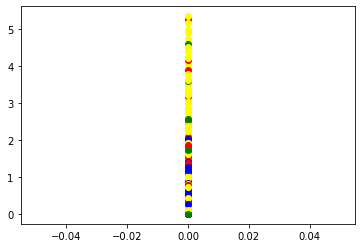

In [ ]:
for x, y in dataset_test:
    pred = encoder.predict(x)
    for i in range(len(pred)):
      temp = np.argmax(y[i])
      plt.plot(pred[i][0].tolist(), pred[i][1].tolist(), 'o', color=col[temp]);
plt.show()


As we can see red and yellow are very close to each other because they are showing birds(raven and eagle)